<a href="https://colab.research.google.com/github/NorahEkuttan/WEEK-9-KNN-AND-BAYES/blob/main/WEEK_9_IP_NORAH_EKUTTAN_KNN_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MORINGA SCHOOL WEEK 8 INDEPENDENT PROJECT NORAH EKUTTAN

## 1. Defining the Question

For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

### a) Specifying the Question

We need to create a model using the Kneighbours that predicts if a person in the Titanic survived or did not survive.In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?”

### b) Defining the Metric for Success

### c) Understanding the context 


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### e) Data Relevance

## 2. Reading the Data

In [648]:

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [649]:
# Loading the Dataset
# 
#
df = pd.read_csv('/content/train (5).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3. Checking the Data

In [650]:
# Determining the no. of records in our dataset
#
df.shape

(891, 12)

In [651]:
# Previewing the top of our dataset
#
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [652]:
# Previewing the bottom of our dataset
# 
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [653]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [654]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [655]:
#checking for duplicates
df.duplicated().sum()


0

In [656]:
#dropping the duplicates
df =df.drop_duplicates()

In [657]:
df.duplicated().sum()

0

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [658]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [659]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [660]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [661]:
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [662]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [663]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [664]:
df.drop(['PassengerId','Name','Ticket','Cabin'],inplace=True,axis=1)

In [665]:
df.dropna(inplace=True)

In [666]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [667]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [668]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [669]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [670]:

df.shape


(889, 8)

In [671]:
#label encoding our columns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()

In [672]:
Sex_dummy = pd.get_dummies(df.Embarked, drop_first=True)

In [673]:
Embarked_dummy = pd.get_dummies(df.Sex, drop_first=True)

In [674]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [675]:
df = pd.concat([df,Embarked_dummy, Sex_dummy], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.000000,1,0,7.2500,S,1,0,1
1,1,1,female,38.000000,1,0,71.2833,C,0,0,0
2,1,3,female,26.000000,0,0,7.9250,S,0,0,1
3,1,1,female,35.000000,1,0,53.1000,S,0,0,1
4,0,3,male,35.000000,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,0,1
887,1,1,female,19.000000,0,0,30.0000,S,0,0,1
888,0,3,female,29.699118,1,2,23.4500,S,0,0,1
889,1,1,male,26.000000,0,0,30.0000,C,1,0,0


In [676]:
df.drop(['Sex','Embarked'],axis=1, inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


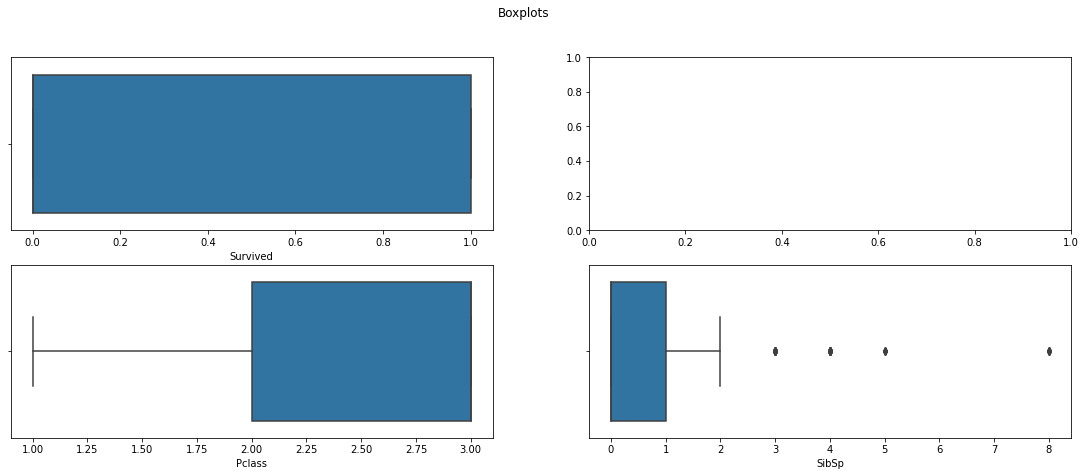

In [677]:
# Checking for outliers
#
fig,((ax1, ax2), (ax3, ax4),) = plt.subplots(2,2, figsize=(19, 7))
fig.suptitle('Boxplots')
sb.boxplot(df['Survived'], ax=ax1)
sb.boxplot(df['Pclass'], ax=ax3)
sb.boxplot(df['SibSp'], ax=ax4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


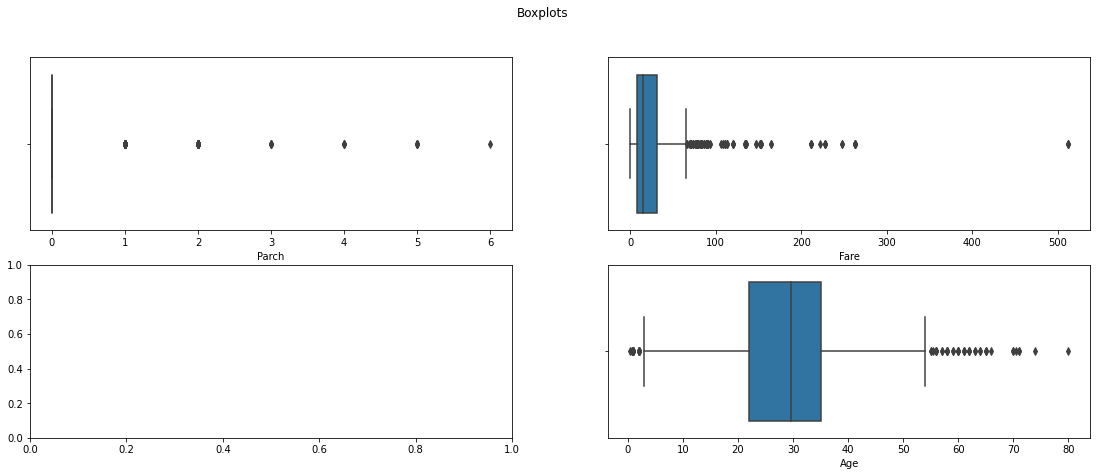

In [678]:
# checking for outliers
#
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(19, 7))
fig.suptitle('Boxplots')
sb.boxplot(df['Parch'], ax=ax1)
sb.boxplot(df['Fare'], ax=ax2)
sb.boxplot(df['Age'], ax=ax4)

## 6. EXPLORATORY DATA ANALYSIS

# UNIVARIATE ANALYSIS

### Categorical variable

In [679]:
df.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [680]:
df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [681]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [682]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

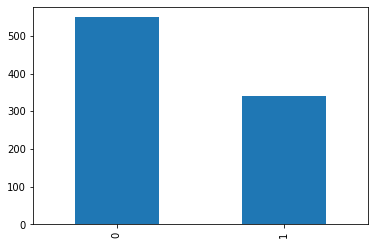

<Figure size 1008x648 with 0 Axes>

In [683]:
df['Survived'].value_counts().plot(kind='bar')
fig=plt.figure(figsize=(14,9))
plt.show()

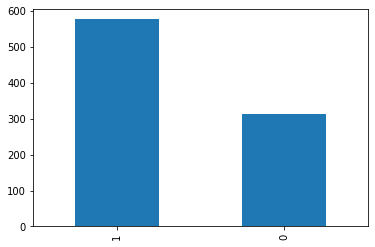

In [684]:
df['male'].value_counts().plot(kind='bar')

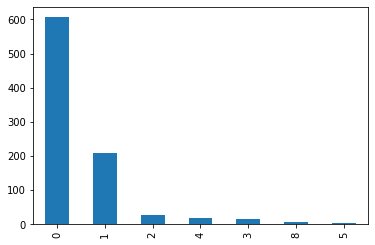

In [685]:
df['SibSp'].value_counts().plot(kind='bar')

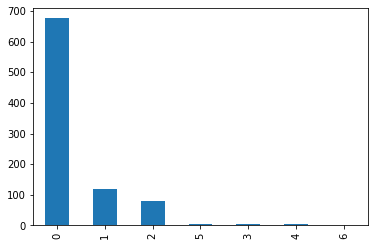

In [686]:
df['Parch'].value_counts().plot(kind='bar')

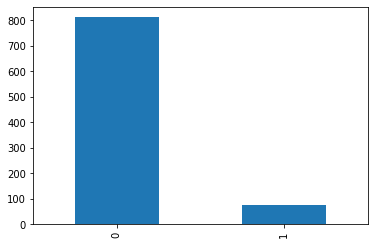

In [687]:
df['Q'].value_counts().plot(kind='bar')


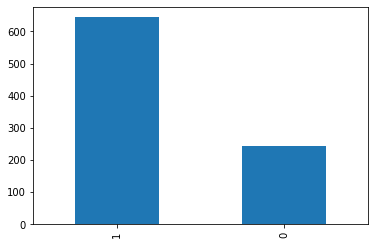

In [688]:
df['S'].value_counts().plot(kind='bar')

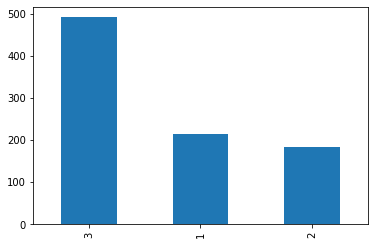

In [689]:
df['Pclass'].value_counts().plot(kind='bar')

### Numerical Variables

Measure of Central Tendency(mean,mode,median)

In [690]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [691]:
#getting the measure of central tendency and Standard deviation together with variance of Age
mean = df["Age"].mean()
median = df["Age"].median()
mode = df["Age"].mode()
std = df["Age"].std()
var = df["Age"].var()
max = df["Age"].max()
min = df["Age"].min()
range = max - min
quantile = df["Age"].quantile([0.25,0.5,0.75])
print('The mean of Age  is',mean)
print('The median of Age is',median)
print('The mode of Age is',mode)
print('The standard deviation of Age is',std)
print('The variance of Age is',var)
print('The Range of Age  is',range)
print('The quantile of Age is',quantile)

The mean of Age  is 29.653446370674192
The median of Age is 29.69911764705882
The mode of Age is 0    29.699118
dtype: float64
The standard deviation of Age is 12.968366309252332
The variance of Age is 168.17852473095093
The Range of Age  is 79.58
The quantile of Age is 0.25    22.000000
0.50    29.699118
0.75    35.000000
Name: Age, dtype: float64


In [692]:
#getting the measure of central tendency and Standard deviation together with variance of Fare
mean = df["Fare"].mean()
median = df["Fare"].median()
mode = df["Fare"].mode()
std = df["Fare"].std()
var = df["Fare"].var()
max = df["Fare"].max()
min = df["Fare"].min()
range = max - min
quantile = df["Fare"].quantile([0.25,0.5,0.75])
print('The mean of Fare is',mean)
print('The median ofFare is',median)
print('The mode of Fare is',mode)
print('The standard deviation Fare of is',std)
print('The variance of Fare is',var)
print('The Range of Fare  is',range)
print('The quantile of Fare is',quantile)

The mean of Fare is 32.09668087739029
The median ofFare is 14.4542
The mode of Fare is 0    8.05
dtype: float64
The standard deviation Fare of is 49.69750431670801
The variance of Fare is 2469.8419353092113
The Range of Fare  is 512.3292
The quantile of Fare is 0.25     7.8958
0.50    14.4542
0.75    31.0000
Name: Fare, dtype: float64


Skewness AND Kurtosis

In [693]:
kurt1 = df['Age'].kurt()
print("The kurtosis for the Age  is: ", kurt1)
if kurt1 > 0:
  print("Leptokurtic")
elif kurt1 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt2 = df['Fare'].kurt()
print("The kurtosis for the Fare is: ", kurt2)
if kurt2 > 0:
  print("Leptokurtic")
elif kurt2 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 



The kurtosis for the Age  is:  0.9790065453677568
Leptokurtic


The kurtosis for the Fare is:  33.508477269700144
Leptokurtic




In [694]:
# Skewness
skew1 = df['Age'].skew()
print("The skewness for the Age is: ", skew1)
if skew1 == 0:
  print("The distribution is symmetrical")
elif skew1 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew2 = df['Fare'].skew()
print("The skewness for the Fare is: ", skew2)
if skew2 == 0:
  print("The distribution is symmetrical")
elif skew2 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')



The skewness for the Age is:  0.43172026491227716
The distribution is positively skewed


The skewness for the Fare is:  4.801440211044194
The distribution is positively skewed




Both Age and fare are positively skewed and the 
Kurtosis is Leptokurtic for both
of them

# BIVARIATE ANALYSIS

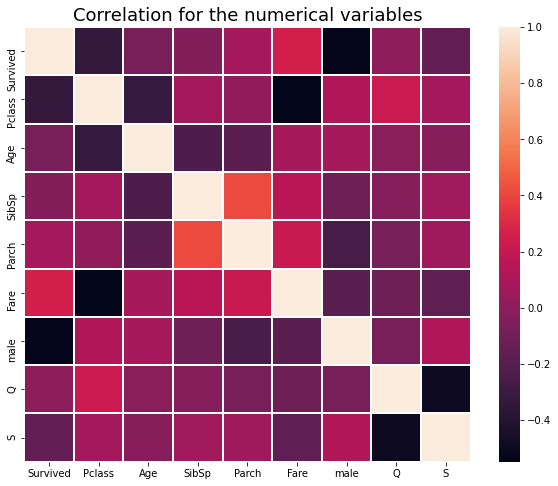

In [695]:
#finding correlation between variables in our dataset
corr = df.corr()
plt.figure(figsize=(10,8))
sb.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=1.0,annot=False)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

## MULTIVARIATE ANALYSIS

In [696]:
# Separating our target label (type) from the other 
X = df.drop(['Survived'],axis=1)
y = df['Survived']



In [697]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda = lda.fit(X, y)
lda_feat = lda.transform(X)
#lda coefficients
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
Important_features = pd.DataFrame(index=X.columns.values, data=lda.coef_[0].T)
Important_features.sort_values(0, ascending=False)


,0
Fare,0.002009
Q,-0.009805
Age,-0.041330
Parch,-0.111021
SibSp,-0.288850
S,-0.456895
Pclass,-1.202841
male,-3.525069


We did the LDA for the multivariate analysis in order to find the 
most commonly used features from our dataset.

# 7.Implementing The Solution

# KNN CLASSIFIER ALGORITHM

In [698]:
# Then loading our libraries
# 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler


In [699]:


# Split the independent and dependent variables
X = df.drop(['Survived'],axis=1)
y = df['Survived']

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [700]:
reg= KNeighborsClassifier()
params = reg.get_params()
params

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [701]:
#Fitting the the KNN classifier
clf = KNeighborsClassifier(5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [702]:
y_pred = clf.predict(X_test)

y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1])

In [703]:
#Testing the accuracy 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[81 24]
 [31 42]]


In [704]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       105
           1       0.64      0.58      0.60        73

    accuracy                           0.69       178
   macro avg       0.68      0.67      0.68       178
weighted avg       0.69      0.69      0.69       178



# **Challenging The Solution**

In [705]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# Getting the variance in the accuracies so we will print the sd
print("Standard Deviation of the cross validation: {:.2f} %".format(accuracies.std()*100))
print("\n")


Accuracy: 70.32 %
Standard Deviation of the cross validation: 6.35 %




In [706]:

from sklearn.model_selection import GridSearchCV
 
parameters = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']},
              {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']}]


In [643]:
#finding the accuracy on the 10 test folds
#the n_jobs is to set all your process to run the grid search
grid_search = GridSearchCV(estimator=reg, param_grid=parameters, scoring='accuracy',
                           cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS")
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS
Best Accuracy: 76.37 %
Best Parameters: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


In [644]:
clf = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan', metric_params=None, n_jobs=None, n_neighbors=8, p=2, weights='distance')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')

In [645]:
y_pred = clf.predict(X_test)

y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1])

In [646]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[84 21]
 [31 42]]


In [647]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       105
           1       0.67      0.58      0.62        73

    accuracy                           0.71       178
   macro avg       0.70      0.69      0.69       178
weighted avg       0.70      0.71      0.70       178



We challenged the solution using the Grid search to pick the best Hyper  parameter tuning in terms of algorithm ='ball_tree', leaf_size=30, metric='manhattan',metric_params=None, n_jobs=None, n_neighbors=8, p=2,weights='distance' which is better compared according to the accuracy scores and the confusion matrix.Comparison btwn the two accuracy

precision    recall  f1-score   support

           0       0.72      0.77      0.75       105
           1       0.64      0.58      0.60        73

  precision    recall  f1-score   support

           0       0.73      0.80      0.76       105
           1       0.67      0.58      0.62        73



## 9. Follow up questions

### a). Did we have the right data?

Yes i can confidently say we had enough data to make the most accurate predictions

### b). Do we need other data to answer our question?

No we do not need any more data.